In [18]:
import time 
import datetime
import numpy as np
from matplotlib import pyplot as plt 

from EvoPoolOptimizer import EvoPoolOpt

# Data preprocessing

### Downloading of DataFrame with desired cities in existing pools 

In [19]:
cities = ['Saint avertin', 'Tarascon', 'Nantes', 'Puygouzon', 'Toulouse', 'Talence', 'Balma', 'Reze', 'Chatellerault', 'Tours', 
          'Montaigu Bouffere', 'Bourges','Frejus', 'Mougins', 'MARIGNANE', 'Pradetan', 'Arles', 'Nice', 'Ollioules', 'MANDELIEU LA NAPOULE', 
          'Martigues', 'Cannes', 'Sete', 'Antibes', 'THIONVILLE', 'SENNECEY', 'ST ETIENNE', 'LYON', 'PAYS VOIRONNAIS', 'RUELISHEIM',
          'SAINT VITOIS', 'LYON', 'GERARDMER', 'KINGERSHEIM', 'DIJON', 'NANCY', 'ST MAUR', 'MICHELET HALLUIN', 'AMIENS', 'VELIZY', 
          'Mouvaux', 'Frépillon', 'CHAVILLE-SEVRES', 'DUNKERQUE', 'LOGNES', 'LAON', 'HARNES', 'CAMBRAI', 'MAROMME CANTELEU', 'ROUEN',
          'ROUEN', '20 Rue Edouard Pailleron, 75019 Paris', 'HEROUVILLE', ' 92100 Boulogne-Billancourt', 'FONTENAYS', 'cormeilles en parisis',
          'ST-JEAN DE BRAYE', 'CAEN', 'WISSOUS', 'CHATEAUDUN', 'LAVAL', '9 Rue Alphonse Baudin, 75011 Paris', 'RENNES', 'PARIS', 
          'CESSON SEVIGNE', 'PIPRIAC', 'SAINT-CLOUD PARIS', 'SAINT-BRIEUC', 'CLAMART', 'MARPIRE CHAMPEAUX', 'BEAUNE', 'ORGERBLON'
          ]

In [20]:
real_pools = {
    'pool1' : ['Saint avertin', 'Tarascon', 'Nantes', 'Puygouzon', 'Toulouse', 'Talence', 'Balma', 'Reze', 'Chatellerault', 'Tours', 'Montaigu Bouffere', 'Bourges'],
    'pool2' : ['Frejus', 'Mougins', 'MARIGNANE', 'Pradetan', 'Arles', 'Nice', 'Ollioules', 'MANDELIEU LA NAPOULE', 'Martigues', 'Cannes', 'Sete', 'Antibes'],
    'pool3' : ['THIONVILLE', 'SENNECEY', 'ST ETIENNE', 'LYON', 'PAYS VOIRONNAIS', 'RUELISHEIM', 'SAINT VITOIS', 'LYON', 'GERARDMER', 'KINGERSHEIM', 'DIJON', 'NANCY'],
    'pool4' : ['ST MAUR', 'MICHELET HALLUIN', 'AMIENS', 'VELIZY', 'Mouvaux', 'Frépillon', 'CHAVILLE-SEVRES', 'DUNKERQUE', 'LOGNES', 'LAON', 'HARNES', 'CAMBRAI'],
    'pool5' : ['MAROMME CANTELEU', 'ROUEN', 'ROUEN', '20 Rue Edouard Pailleron, 75019 Paris', 'HEROUVILLE', ' 92100 Boulogne-Billancourt', 'FONTENAYS', 'cormeilles en parisis', 'ST-JEAN DE BRAYE', 'CAEN', 'WISSOUS', 'CHATEAUDUN'],
    'pool6' : ['LAVAL', '9 Rue Alphonse Baudin, 75011 Paris', 'RENNES', 'PARIS', 'CESSON SEVIGNE', 'PIPRIAC', 'SAINT-CLOUD PARIS', 'SAINT-BRIEUC', 'CLAMART', 'MARPIRE CHAMPEAUX', 'BEAUNE', 'ORGERBLON']
}

### Creation of an Evolutionnary Pool Optimizer Object

In [22]:
opt = EvoPoolOpt(cities_list=cities, nb_pools=6, nb_chromosomes=100)


The following cities are duplicated: 
LYON
ROUEN


# Plotting existing pools configuration

In [23]:
real_pools_chr = opt.dict_to_chromosome(real_pools)
real_pools_distances = opt.calculate_chromosome_distance(real_pools_chr, pools_details=True)
print(f"\nTotal distance travalled with this configuration : {real_pools_distances}")
opt.display_map_pools_configuration(real_pools_chr)

Distance within each pool : 

{0: 302, 1: 90, 2: 114, 3: 82, 4: 85, 5: 188}

Total distance travalled with this configuration : 861


### Optimization loop

In [17]:
import importlib
import EvoPoolOptimizer
importlib.reload(EvoPoolOptimizer)
from EvoPoolOptimizer import EvoPoolOpt

In [24]:
num_iterations=10_000
measurement_step=100
nb_measures = num_iterations//measurement_step

opt.optimize(num_iterations=num_iterations, measurement_step=measurement_step)

Iteration 10000 statistics : mean : 770.12  min : 550.00  max : 1150.00
Optimization done in : 0:01:13.795727


# Plotting final pools configuration 

In [25]:
print(f"Best chromosome :")
print(opt.get_dict_chromosome(opt.best_chromosome))
print()
chromosome_distance = opt.calculate_chromosome_distance(opt.best_chromosome, pools_details=True)
print(f"Total chromosome distance : {chromosome_distance}")

opt.display_map_pools_configuration(opt.best_chromosome)

Best chromosome :
{'Saint avertin': 5, 'Tarascon': 5, 'Nantes': 0, 'Puygouzon': 5, 'Toulouse': 5, 'Talence': 5, 'Balma': 5, 'Reze': 0, 'Chatellerault': 5, 'Tours': 0, 'Montaigu Bouffere': 0, 'Bourges': 5, 'Frejus': 1, 'Mougins': 1, 'MARIGNANE': 1, 'Pradetan': 1, 'Arles': 1, 'Nice': 1, 'Ollioules': 1, 'MANDELIEU LA NAPOULE': 1, 'Martigues': 1, 'Cannes': 1, 'Sete': 1, 'Antibes': 1, 'THIONVILLE': 2, 'SENNECEY': 2, 'ST ETIENNE': 2, 'LYON': 2, 'PAYS VOIRONNAIS': 2, 'RUELISHEIM': 2, 'SAINT VITOIS': 2, 'GERARDMER': 2, 'KINGERSHEIM': 2, 'DIJON': 2, 'NANCY': 2, 'ST MAUR': 4, 'MICHELET HALLUIN': 4, 'AMIENS': 4, 'VELIZY': 3, 'Mouvaux': 4, 'Frépillon': 3, 'CHAVILLE-SEVRES': 3, 'DUNKERQUE': 4, 'LOGNES': 3, 'LAON': 4, 'HARNES': 4, 'CAMBRAI': 4, 'MAROMME CANTELEU': 4, 'ROUEN': 4, '20 Rue Edouard Pailleron, 75019 Paris': 3, 'HEROUVILLE': 3, ' 92100 Boulogne-Billancourt': 3, 'FONTENAYS': 5, 'cormeilles en parisis': 3, 'ST-JEAN DE BRAYE': 3, 'CAEN': 0, 'WISSOUS': 3, 'CHATEAUDUN': 3, 'LAVAL': 0, '9 Rue A

### Evolution of best chromosome metrics

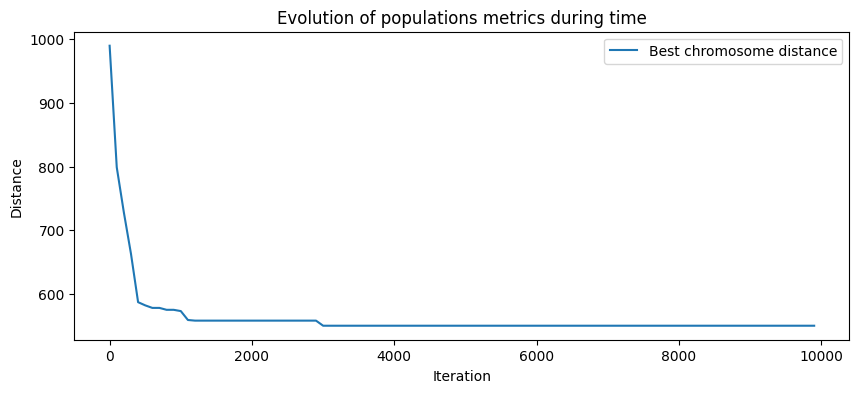

In [26]:
x = np.arange(0, nb_measures) * measurement_step
plt.figure(figsize=(10,4))
plt.plot(x, opt.min_distance, label='Best chromosome distance')
plt.xlabel('Iteration')
plt.ylabel('Distance')
plt.legend()

plt.title('Evolution of populations metrics during time')
plt.show()

